![Example 6-1](./images/example6-1.jpg)
![Example 6-1 part 2](./images/example6-1b.jpg)

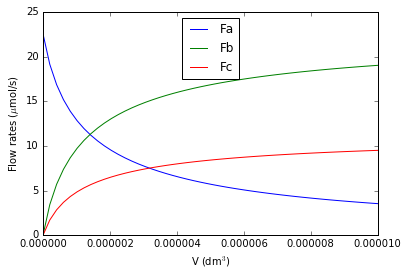

In [16]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from matplotlib import pyplot as plt

#odeint?

def k_Arrhenius(T):
    Ea = 24e3 # cal/mol
    R = 1.987 # cal/mol/K
    k = 0.29 * np.exp(Ea/R *(1./500-1./T))
    return k # L/mol/s

def dEverythingbydV(everything, V):
    Fa, Fb, Fc = everything

    P0 = 16. # atm
    T0 = 425 + 273.15 # K
    R = 8.206e-2 # atm-L/mol-K
    k = k_Arrhenius(T0) # L/mol/s
    Ct0 = P0 / (R * T0) # mol/L
    Ft = Fa + Fb + Fc # mol/s
    Ca = Ct0 * Fa/Ft
    r1 = (k/2.) * Ca*Ca
    ra = -2*r1
    rb = 2*r1
    rc = 1*r1
    dFadV = ra
    dFbdV = rb
    dFcdV = rc
    return dFadV, dFbdV, dFcdV

Fa0 = 2.26e-5 #mol/s
everything0 = np.array([Fa0, 0., 0.])
dEverythingbydV(everything0, 0)

V = np.linspace(0,1e-5)
output = odeint(dEverythingbydV, everything0, V)
Fa, Fb, Fc = output.T
plt.plot(V,Fa*1e6,label='Fa')
plt.plot(V,Fb*1e6,label='Fb')
plt.plot(V,Fc*1e6,label='Fc')
plt.legend(loc='best')
plt.xlabel('V (dm$^3$)')
plt.ylabel('Flow rates ($\mu$mol/s)')
plt.show()